In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from plot_settings import global_setting

global_setting()

In [2]:
model_names = ['FlatVel-A',        
               'CurveVel-A',            
               'FlatFault-A', 
              'CurveFault-A']

metrics = ["MSE", "MAE", "SSIM"]


In [3]:
results_dict = {}
for metric in metrics:
    results_dict[metric] = pd.DataFrame(columns=["Dataset", "Metric"])
    results_dict[metric]["Dataset"] = model_names
    results_dict[metric]["Metric"] = metric


In [4]:
results_dict["MSE"]

,Dataset,Metric
0,FlatVel-A,MSE
1,CurveVel-A,MSE
2,FlatFault-A,MSE
3,CurveFault-A,MSE


In [5]:
model_dict = {"Small_70" : "UNetInverseModel_17M_NoSkip",
              "Large_70" : "UNetInverseModel_33M_NoSkip",
              "Small_64" : "UNetInverseModel_17M_Latent64_No_Skip",
              "Large_64" : "UNetInverseModel_33M_Latent64_No_Skip",
              "Small_32" : "UNetInverseModel_17M_Latent32_No_Skip",
              "Large_32" : "UNetInverseModel_33M_Latent32_No_Skip",
              "Small_16" : "UNetInverseModel_17M_Latent16_No_Skip",
              "Large_16" : "UNetInverseModel_33M_Latent16_No_Skip",
              "Small_8" : "UNetInverseModel_17M_Latent8_No_Skip",
              "Large_8" : "UNetInverseModel_33M_Latent8_No_Skip",
             }


color_dict = {
    "Small_70": 'blue',
    "Large_70": 'green',
    "Small_64": 'red',
    "Large_64": 'cyan',
    "Small_32": 'magenta',
    "Large_32": 'yellow',
    "Small_16": 'black',
    "Large_16": 'purple',
    "Small_8": 'orange',
    "Large_8": 'pink'
}


basepath = "../Metrics_final/"
prefix = "eval_metric"
mode = "Velocity"

sheets = ["Velocity_unnorm_MAE", "Velocity_unnorm_MSE", "Velocity_SSIM"]

In [6]:
for key, value in model_dict.items():
    grid_file = os.path.join(basepath, prefix+value+".xlsx")
    model_name = key
    for metric in sheets:
        metric_type = metric.split("_")[-1]
        #read the particular metric sheet in the result grid file (dataset vs dataset)
        df = pd.read_excel(grid_file, engine='openpyxl', header=0, index_col=0, sheet_name=metric)
        metric_diag = [df[dataset.lower()][dataset] for dataset in model_names]
        results_dict[metric_type][model_name] = metric_diag

In [7]:
results_dict["SSIM"]

,Dataset,Metric,Small_70,Large_70,Small_64,Large_64,Small_32,Large_32,Small_16,Large_16,Small_8,Large_8
0,FlatVel-A,SSIM,0.995422,0.994193,0.989942,0.995588,0.997133,0.996980,0.989870,0.803020,0.956903,0.575147
1,CurveVel-A,SSIM,0.885109,0.915541,0.886150,0.908952,0.881560,0.871840,0.856121,0.773611,0.647544,0.484512
2,FlatFault-A,SSIM,0.990404,0.990386,0.989751,0.991340,0.989981,0.989869,0.983739,0.939980,0.969658,0.660509
3,CurveFault-A,SSIM,0.975734,0.981749,0.973632,0.977844,0.974730,0.972156,0.962679,0.910380,0.920114,0.621105


In [8]:
def extract_and_sort(df, key="Small"):
    df = df.filter(like=key)
    sorted_columns = sorted(df.columns, key=lambda x: int(x.split('_')[-1]))
    # Rearranging the DataFrame based on the sorted column names
    sorted_df = df[sorted_columns]
    latent_dims = [int(string.split("_")[-1]) for string in list(sorted_df.columns)]
    return latent_dims, sorted_df.values[0] 

color_dict = {
              'FlatVel-A':"lightcoral", 
              'FlatVel-B':"firebrick",
              'CurveVel-A':"limegreen",
              'CurveVel-B':"darkgreen",
              'FlatFault-A': "deepskyblue",
              'FlatFault-B': "blue",
              'CurveFault-A':"violet",
              'CurveFault-B':"purple"
             }


# Large UNets

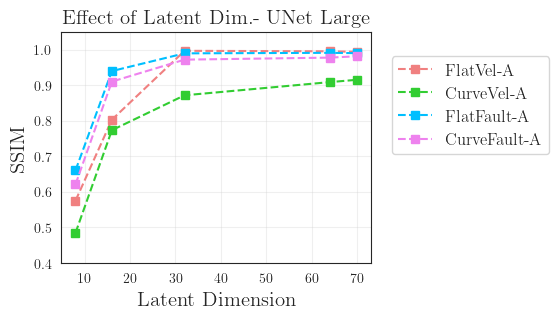

In [9]:
metric = "SSIM"
unet_type = "Large"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, large_metrics = extract_and_sort(dataset_df, key=unet_type)
#     plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^")#, label=dataset, color=color_dict[dataset])
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.ylim([4, 2e4])
# plt.yscale("log")
plt.ylim([0.4, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- UNet {unet_type}", fontsize=15)
plt.show()

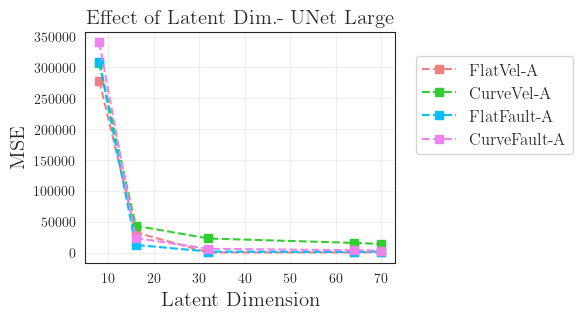

In [10]:
metric = "MSE"
unet_type = "Large"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, large_metrics = extract_and_sort(dataset_df, key=unet_type)
#     plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^")#, label=dataset, color=color_dict[dataset])
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- UNet {unet_type}", fontsize=15)
plt.show()

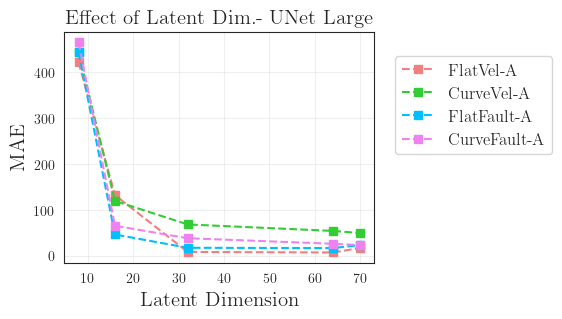

In [11]:
metric = "MAE"
unet_type = "Large"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, large_metrics = extract_and_sort(dataset_df, key=unet_type)
#     plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^")#, label=dataset, color=color_dict[dataset])
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- UNet {unet_type}", fontsize=15)
plt.show()

# Small UNets

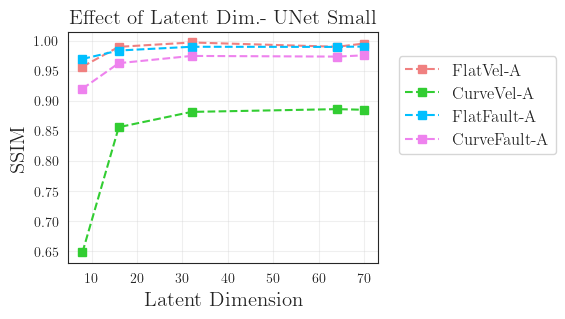

In [12]:
metric = "SSIM"
unet_type = "Small"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, large_metrics = extract_and_sort(dataset_df, key=unet_type)
#     plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^")#, label=dataset, color=color_dict[dataset])
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.ylim([4, 2e4])
# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- UNet {unet_type}", fontsize=15)
plt.show()

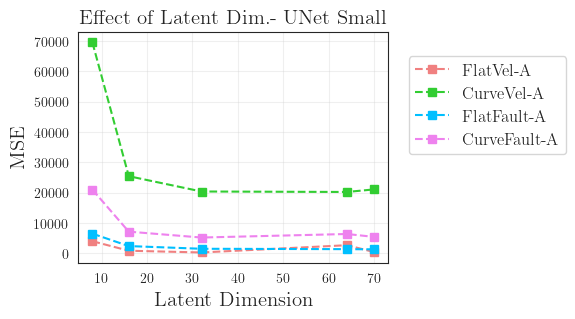

In [13]:
metric = "MSE"
unet_type = "Small"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, large_metrics = extract_and_sort(dataset_df, key=unet_type)
#     plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^")#, label=dataset, color=color_dict[dataset])
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.ylim([4, 2e4])
# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- UNet {unet_type}", fontsize=15)
plt.show()

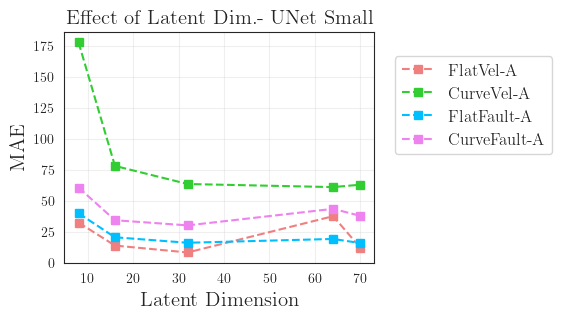

In [14]:
metric = "MAE"
unet_type = "Small"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, large_metrics = extract_and_sort(dataset_df, key=unet_type)
#     plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^")#, label=dataset, color=color_dict[dataset])
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.ylim([4, 2e4])
# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- UNet {unet_type}", fontsize=15)
plt.show()

# Comparing Large and Small on Family A

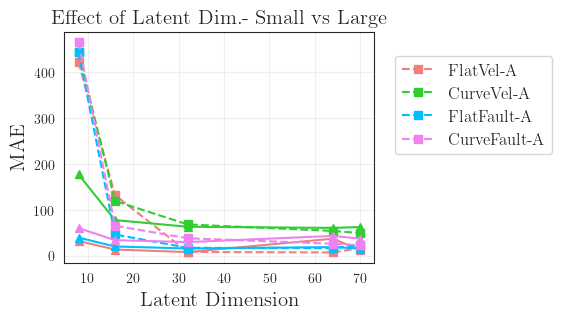

In [15]:
metric = "MAE"
unet_type = "Small"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("A")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, small_metrics = extract_and_sort(dataset_df, key="Small")
    latent_dims, large_metrics = extract_and_sort(dataset_df, key="Large")
    plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^", color=color_dict[dataset])#, label=dataset)
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.ylim([4, 2e4])
# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- Small vs Large", fontsize=15)
plt.show()

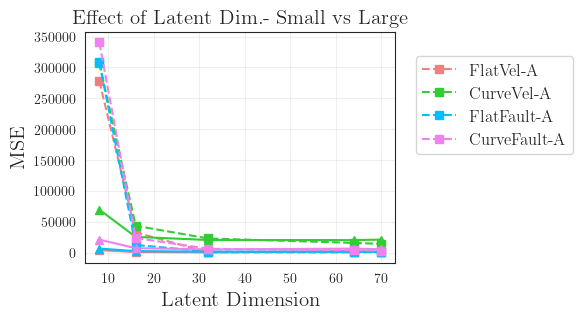

In [16]:
metric = "MSE"
unet_type = "Small"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("A")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, small_metrics = extract_and_sort(dataset_df, key="Small")
    latent_dims, large_metrics = extract_and_sort(dataset_df, key="Large")
    plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^", color=color_dict[dataset])#, label=dataset)
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.ylim([4, 2e4])
# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- Small vs Large", fontsize=15)
plt.show()

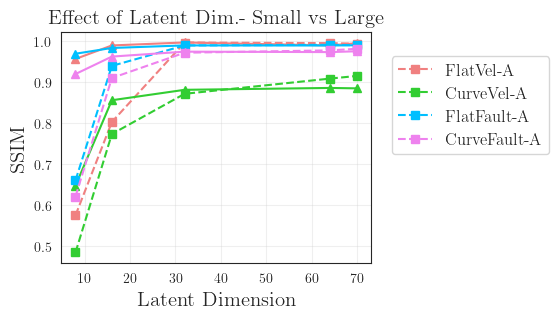

In [17]:
metric = "SSIM"
unet_type = "Small"

results_A = results_dict[metric][results_dict[metric]["Dataset"].str.contains("A")]

plt.figure(figsize=(4, 3))
datasets = list(results_A['Dataset'])
for dataset in datasets:
    dataset_df = results_A[results_A['Dataset']==dataset] 
    latent_dims, small_metrics = extract_and_sort(dataset_df, key="Small")
    latent_dims, large_metrics = extract_and_sort(dataset_df, key="Large")
    plt.plot(latent_dims, small_metrics, linestyle="solid", marker="^", color=color_dict[dataset])#, label=dataset)
    plt.plot(latent_dims, large_metrics, linestyle="dashed", marker="s", label=dataset, color=color_dict[dataset])

# plt.ylim([4, 2e4])
# plt.yscale("log")
# plt.ylim([0.49, 1.05])
plt.legend(loc="upper right", ncol=1, fontsize=12, bbox_to_anchor=[1.6, .93])
plt.grid("on", alpha=0.3)
plt.ylabel(f"{metric}", fontsize=15)
plt.xlabel(f"Latent Dimension", fontsize=15)
plt.title(f"Effect of Latent Dim.- Small vs Large", fontsize=15)
plt.show()